In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
df = pd.read_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_missing_value_imputation.csv')

In [53]:
df.shape

(3248, 20)

In [54]:
df[df['society'].isnull()]

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
474,NaN,flat,0.6,3692.0,2.0,2,0,2.0,Under Construction,T8073153,sector 78,1625.0,0,0,0,0,0,0,0,812.5


In [55]:
# Remove rows where 'society' is NaN
df = df[df['society'].notna()]

In [56]:
df.head()

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,emaar palm gardens,flat,1.75,9211.0,3.0,3,3,6.0,Relatively New,V69525180,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,eros wembley estate,flat,1.40,10174.0,3.0,3,2,9.0,Relatively New,K69325724,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,ss the leaf,flat,2.13,7575.0,4.0,4,3,6.0,Relatively New,K70087544,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,international city by sobha phase 2,house,6.25,10035.0,5.0,7,3+,3.0,Relatively New,NaN,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,ss the coralwood,flat,1.10,4857.0,3.0,3,2,9.0,Relatively New,H66415758,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


In [57]:
# Remove the 'property_id' column in-place
df.drop(columns=['property_id'], inplace=True)

In [58]:
df.head()

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,emaar palm gardens,flat,1.75,9211.0,3.0,3,3,6.0,Relatively New,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,eros wembley estate,flat,1.40,10174.0,3.0,3,2,9.0,Relatively New,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,ss the leaf,flat,2.13,7575.0,4.0,4,3,6.0,Relatively New,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,international city by sobha phase 2,house,6.25,10035.0,5.0,7,3+,3.0,Relatively New,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,ss the coralwood,flat,1.10,4857.0,3.0,3,2,9.0,Relatively New,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


In [59]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [60]:
train_df.head()

,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,1.75,3.0,3,3,6.0,Relatively New,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,flat,1.40,3.0,3,2,9.0,Relatively New,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,flat,2.13,4.0,4,3,6.0,Relatively New,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,house,6.25,5.0,7,3+,3.0,Relatively New,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,flat,1.10,3.0,3,2,9.0,Relatively New,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


### luxury score

<Axes: ylabel='luxury_score'>

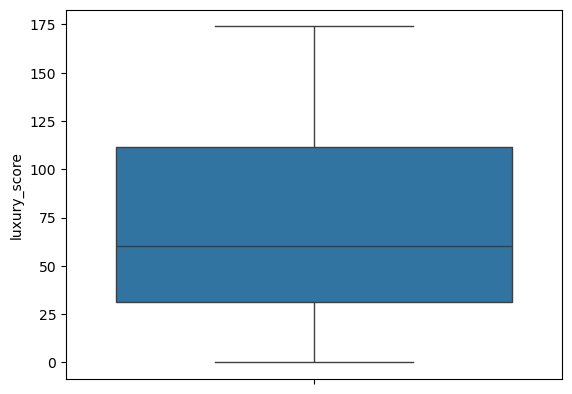

In [61]:
sns.boxplot(df['luxury_score'])

In [62]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [63]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [64]:
train_df.head()

,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio,luxury_category
0,flat,1.75,3.0,3,3,6.0,Relatively New,sector 83,1600.0,0,1,0,0,0,2,150,633.333333,High
1,flat,1.40,3.0,3,2,9.0,Relatively New,sector 50,1239.0,0,0,1,0,0,2,117,458.666667,Medium
2,flat,2.13,4.0,4,3,6.0,Relatively New,sector 85,2600.0,0,0,0,0,0,0,49,703.000000,Low
3,house,6.25,5.0,7,3+,3.0,Relatively New,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000,Medium
4,flat,1.10,3.0,3,2,9.0,Relatively New,sector 84,1575.0,0,0,0,0,0,0,75,755.000000,Medium


### floorNum

<Axes: ylabel='floorNum'>

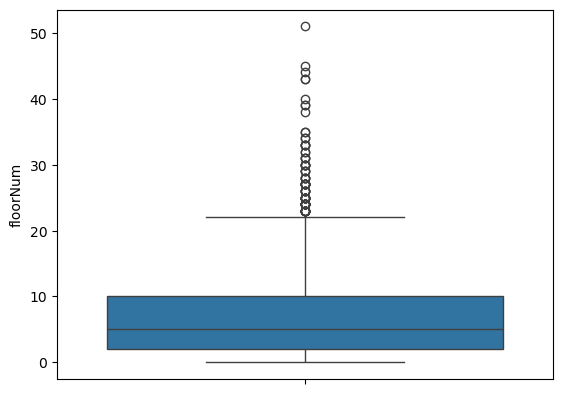

In [65]:
sns.boxplot(df['floorNum'])

In [66]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [67]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [68]:
train_df.head()

,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio,luxury_category,floor_category
0,flat,1.75,3.0,3,3,6.0,Relatively New,sector 83,1600.0,0,1,0,0,0,2,150,633.333333,High,Mid Floor
1,flat,1.40,3.0,3,2,9.0,Relatively New,sector 50,1239.0,0,0,1,0,0,2,117,458.666667,Medium,Mid Floor
2,flat,2.13,4.0,4,3,6.0,Relatively New,sector 85,2600.0,0,0,0,0,0,0,49,703.000000,Low,Mid Floor
3,house,6.25,5.0,7,3+,3.0,Relatively New,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000,Medium,Mid Floor
4,flat,1.10,3.0,3,2,9.0,Relatively New,sector 84,1575.0,0,0,0,0,0,0,75,755.000000,Medium,Mid Floor


In [69]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [70]:
train_df.head()

,property_type,price,bedRoom,bathroom,balcony,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,area_room_ratio,luxury_category,floor_category
0,flat,1.75,3.0,3,3,Relatively New,sector 83,1600.0,0,1,0,0,0,2,633.333333,High,Mid Floor
1,flat,1.40,3.0,3,2,Relatively New,sector 50,1239.0,0,0,1,0,0,2,458.666667,Medium,Mid Floor
2,flat,2.13,4.0,4,3,Relatively New,sector 85,2600.0,0,0,0,0,0,0,703.000000,Low,Mid Floor
3,house,6.25,5.0,7,3+,Relatively New,sector 109,6228.0,1,1,1,1,0,0,1245.600000,Medium,Mid Floor
4,flat,1.10,3.0,3,2,Relatively New,sector 84,1575.0,0,0,0,0,0,0,755.000000,Medium,Mid Floor


In [71]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming train_df is your original DataFrame
# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

# Select the categorical columns (object type columns)
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Dictionary to store the encoders for each categorical column
encoders = {}

# Apply label encoding to categorical columns and save the encoders
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    encoders[col] = oe.categories_  # Save categories to revert back later
    print(f"Categories for {col}: {oe.categories_}")

# Now, 'data_label_encoded' has the categorical columns label-encoded

# Splitting the dataset into features (X_label) and target (y_label)
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

Categories for property_type: [array(['flat', 'house'], dtype=object)]
Categories for balcony: [array(['0', '1', '2', '3', '3+'], dtype=object)]
Categories for agePossession: [array(['Moderately Old', 'New Property', 'Old Property', 'Relatively New',
       'Under Construction'], dtype=object)]
Categories for sector: [array(['a block sushant lok phase 1', 'b block sushant lok phase 1',
       'bhondsi', 'c block sushant lok phase 1', 'garhi harsaru',
       'laxmi garden', 'sector 1', 'sector 10', 'sector 102',
       'sector 103', 'sector 104', 'sector 105', 'sector 106',
       'sector 107', 'sector 108', 'sector 109', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 12a', 'sector 13', 'sector 14', 'sector 15',
       'sector 17', 'sector 1a', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       '

In [72]:
y_label

0       1.75
1       1.40
2       2.13
3       6.25
4       1.10
        ... 
3243    4.55
3244    0.25
3245    5.50
3246    4.70
3247    1.32
Name: price, Length: 3247, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

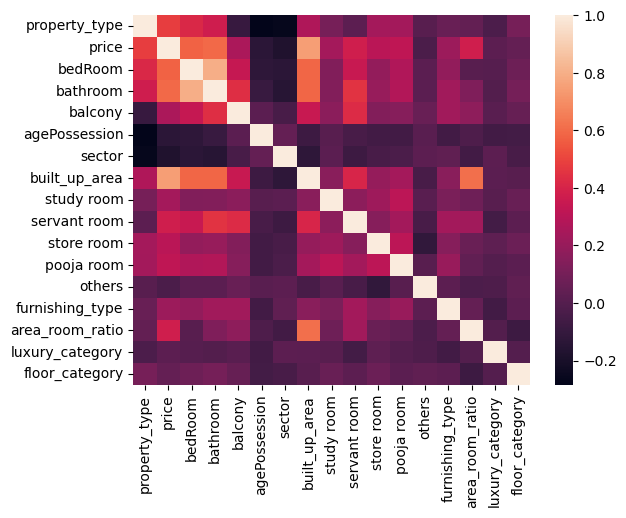

In [73]:
 sns.heatmap(data_label_encoded.corr())

In [74]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,price,1.000000
1,bedRoom,0.578202
2,bathroom,0.595326
3,balcony,0.259109
4,agePossession,-0.137514
5,sector,-0.178611
6,built_up_area,0.745123
7,study room,0.242125
8,servant room,0.373479
9,store room,0.306766


### Technique 2 - Random Forest Feature Importance

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.636230
0,property_type,0.093385
5,sector,0.086631
13,area_room_ratio,0.051164
2,bathroom,0.023376
1,bedRoom,0.022358
8,servant room,0.019586
4,agePossession,0.012784
3,balcony,0.012065
7,study room,0.008819


### Technique 3 - Gradient Boosting Feature importances

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.654170
5,sector,0.091177
0,property_type,0.089278
1,bedRoom,0.045108
13,area_room_ratio,0.038960
2,bathroom,0.033029
8,servant room,0.024848
9,store room,0.008265
10,pooja room,0.004075
4,agePossession,0.003844


In [77]:
df.isnull().sum()

society            0
property_type      0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
sector             0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
area_room_ratio    0
dtype: int64

### Technique 4 - Permutation Importance

In [78]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.640025
0,property_type,0.215919
5,sector,0.100654
13,area_room_ratio,0.055857
8,servant room,0.022254
1,bedRoom,0.018906
2,bathroom,0.018749
9,store room,0.005374
14,luxury_category,0.003494
15,floor_category,0.002280


### Technique 5 - LASSO

In [79]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.593960
0,property_type,0.708557
2,bathroom,0.297090
9,store room,0.217955
7,study room,0.202015
8,servant room,0.168938
12,furnishing_type,0.150619
10,pooja room,0.076326
14,luxury_category,0.058797
1,bedRoom,0.015052


### Technique 6 - RFE

In [80]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.638697
0,property_type,0.092925
5,sector,0.086584
13,area_room_ratio,0.051187
2,bathroom,0.022084
8,servant room,0.020415
1,bedRoom,0.019716
4,agePossession,0.012893
3,balcony,0.010672
10,pooja room,0.008524


### Technique 7 - Linear Regression Weights

In [81]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.625124
0,property_type,0.709665
2,bathroom,0.303998
9,store room,0.222629
7,study room,0.210523
8,servant room,0.180447
12,furnishing_type,0.160575
10,pooja room,0.076553
14,luxury_category,0.069775
4,agePossession,0.003047


### Technique 8 - SHAP

In [82]:
# !pip install shap

In [83]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.23310819, -0.01205606,  0.0390987 , ...,  0.05564199,
         0.0185123 , -0.00623014],
       [-0.22309778, -0.03065676,  0.07259237, ..., -0.07447598,
         0.00473252, -0.00813727],
       [-0.35348732,  0.07045938,  0.05338876, ..., -0.03971007,
        -0.00943245, -0.01119044],
       ...,
       [ 1.67642996,  0.08210763, -0.028955  , ..., -0.03848233,
        -0.01027373, -0.05129575],
       [-0.42469223, -0.12506784, -0.05511647, ...,  0.26381995,
        -0.02606312, -0.02177531],
       [-0.17138683, -0.04990841, -0.08800721, ..., -0.01774487,
        -0.0143877 , -0.00385446]])

In [84]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.269770
0,property_type,0.506649
5,sector,0.330567
13,area_room_ratio,0.130068
2,bathroom,0.103330
8,servant room,0.098332
1,bedRoom,0.073831
3,balcony,0.039080
4,agePossession,0.025308
12,furnishing_type,0.023853


In [85]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [86]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
bedRoom,0.578202,0.022358,0.045108,0.018906,0.015052,0.019716,0.000930,0.073831
bathroom,0.595326,0.023376,0.033029,0.018749,0.297090,0.022084,0.303998,0.103330
balcony,0.259109,0.012065,0.001362,-0.000687,-0.046390,0.010672,-0.068720,0.039080
agePossession,-0.137514,0.012784,0.003844,-0.000403,-0.000000,0.012893,0.003047,0.025308
sector,-0.178611,0.086631,0.091177,0.100654,-0.055857,0.086584,-0.065672,0.330567
built_up_area,0.745123,0.636230,0.654170,0.640025,1.593960,0.638697,1.625124,1.269770
study room,0.242125,0.008819,0.001504,0.001571,0.202015,0.007465,0.210523,0.022057
servant room,0.373479,0.019586,0.024848,0.022254,0.168938,0.020415,0.180447,0.098332
store room,0.306766,0.006579,0.008265,0.005374,0.217955,0.006539,0.222629,0.017016


In [87]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [88]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.688095
sector             0.111580
area_room_ratio    0.055862
bathroom           0.031031
bedRoom            0.030279
servant room       0.028381
agePossession      0.008726
balcony            0.008725
store room         0.007499
study room         0.006298
pooja room         0.005902
luxury_category    0.005576
floor_category     0.005362
furnishing_type    0.005081
others             0.001604
dtype: float64

In [89]:
# to drop pooja room, study room, others
X_label

,property_type,bedRoom,bathroom,balcony,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,area_room_ratio,luxury_category,floor_category
0,0.0,3.0,3,3.0,3.0,90.0,1600.0,0,1,0,0,0,2,633.333333,0.0,2.0
1,0.0,3.0,3,2.0,3.0,57.0,1239.0,0,0,1,0,0,2,458.666667,2.0,2.0
2,0.0,4.0,4,3.0,3.0,92.0,2600.0,0,0,0,0,0,0,703.000000,1.0,2.0
3,1.0,5.0,7,4.0,3.0,15.0,6228.0,1,1,1,1,0,0,1245.600000,2.0,2.0
4,0.0,3.0,3,2.0,3.0,91.0,1575.0,0,0,0,0,0,0,755.000000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0.0,4.0,4,4.0,3.0,8.0,4630.0,0,0,0,0,0,2,1137.500000,2.0,0.0
3244,0.0,1.0,1,0.0,3.0,13.0,318.0,0,0,0,0,0,0,318.000000,2.0,1.0
3245,1.0,4.0,3,3.0,2.0,36.0,1800.0,0,0,0,1,1,2,450.000000,1.0,1.0
3246,0.0,4.0,4,4.0,3.0,88.0,6234.0,0,1,0,0,0,2,1731.500000,2.0,0.0


In [90]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [91]:
scores.mean()

0.7920075902800843

In [92]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [93]:
scores.mean()

0.7957671780211953

In [94]:
export_df = X_label.drop(columns=['area_room_ratio', 'study room', 'pooja room', 'others'])
export_df['price'] = y_label

In [95]:
export_df.to_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_post_feature_selection.csv', index=False)

In [113]:
export_df.head()

,property_type,bedRoom,bathroom,balcony,agePossession,sector,built_up_area,servant room,store room,furnishing_type,area_room_ratio,luxury_category,floor_category,price
0,0.0,3.0,3,3.0,3.0,90.0,1600.0,1,0,2,633.333333,0.0,2.0,1.75
1,0.0,3.0,3,2.0,3.0,57.0,1239.0,0,1,2,458.666667,2.0,2.0,1.40
2,0.0,4.0,4,3.0,3.0,92.0,2600.0,0,0,0,703.000000,1.0,2.0,2.13
3,1.0,5.0,7,4.0,3.0,15.0,6228.0,1,1,0,1245.600000,2.0,2.0,6.25
4,0.0,3.0,3,2.0,3.0,91.0,1575.0,0,0,0,755.000000,2.0,2.0,1.10


In [114]:
df = pd.read_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_missing_value_imputation.csv')
df.head()

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,emaar palm gardens,flat,1.75,9211.0,3.0,3,3,6.0,Relatively New,V69525180,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,eros wembley estate,flat,1.40,10174.0,3.0,3,2,9.0,Relatively New,K69325724,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,ss the leaf,flat,2.13,7575.0,4.0,4,3,6.0,Relatively New,K70087544,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,international city by sobha phase 2,house,6.25,10035.0,5.0,7,3+,3.0,Relatively New,NaN,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,ss the coralwood,flat,1.10,4857.0,3.0,3,2,9.0,Relatively New,H66415758,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


In [115]:
df[df['society'].isnull()]

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
474,NaN,flat,0.6,3692.0,2.0,2,0,2.0,Under Construction,T8073153,sector 78,1625.0,0,0,0,0,0,0,0,812.5


In [116]:
# Remove rows where 'society' is NaN
df = df[df['society'].notna()]

In [117]:
df.head()

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,emaar palm gardens,flat,1.75,9211.0,3.0,3,3,6.0,Relatively New,V69525180,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,eros wembley estate,flat,1.40,10174.0,3.0,3,2,9.0,Relatively New,K69325724,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,ss the leaf,flat,2.13,7575.0,4.0,4,3,6.0,Relatively New,K70087544,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,international city by sobha phase 2,house,6.25,10035.0,5.0,7,3+,3.0,Relatively New,NaN,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,ss the coralwood,flat,1.10,4857.0,3.0,3,2,9.0,Relatively New,H66415758,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


In [118]:
df.drop(columns=['society','price_per_sqft','property_id'],inplace=True)

In [119]:
df

,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,1.75,3.0,3,3,6.0,Relatively New,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,flat,1.40,3.0,3,2,9.0,Relatively New,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,flat,2.13,4.0,4,3,6.0,Relatively New,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,house,6.25,5.0,7,3+,3.0,Relatively New,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,flat,1.10,3.0,3,2,9.0,Relatively New,sector 84,1575.0,0,0,0,0,0,0,75,755.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,flat,4.55,4.0,4,3+,11.0,Relatively New,sector 102,4630.0,0,0,0,0,0,2,60,1137.500000
3244,flat,0.25,1.0,1,0,0.0,Relatively New,sector 107,318.0,0,0,0,0,0,0,55,318.000000
3245,house,5.50,4.0,3,3,2.0,Old Property,sector 28,1800.0,0,0,0,1,1,2,22,450.000000
3246,flat,4.70,4.0,4,3+,19.0,Relatively New,sector 81,6234.0,0,1,0,0,0,2,140,1731.500000


In [120]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [121]:
df['luxury_category'] = df['luxury_score'].apply(categorize_luxury)

In [122]:
df

,property_type,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio,luxury_category
0,flat,1.75,3.0,3,3,6.0,Relatively New,sector 83,1600.0,0,1,0,0,0,2,150,633.333333,High
1,flat,1.40,3.0,3,2,9.0,Relatively New,sector 50,1239.0,0,0,1,0,0,2,117,458.666667,Medium
2,flat,2.13,4.0,4,3,6.0,Relatively New,sector 85,2600.0,0,0,0,0,0,0,49,703.000000,Low
3,house,6.25,5.0,7,3+,3.0,Relatively New,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000,Medium
4,flat,1.10,3.0,3,2,9.0,Relatively New,sector 84,1575.0,0,0,0,0,0,0,75,755.000000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,flat,4.55,4.0,4,3+,11.0,Relatively New,sector 102,4630.0,0,0,0,0,0,2,60,1137.500000,Medium
3244,flat,0.25,1.0,1,0,0.0,Relatively New,sector 107,318.0,0,0,0,0,0,0,55,318.000000,Medium
3245,house,5.50,4.0,3,3,2.0,Old Property,sector 28,1800.0,0,0,0,1,1,2,22,450.000000,Low
3246,flat,4.70,4.0,4,3+,19.0,Relatively New,sector 81,6234.0,0,1,0,0,0,2,140,1731.500000,Medium


In [123]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [124]:
df['floor_category'] = df['floorNum'].apply(categorize_floor)

In [126]:
df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [127]:
df = df.drop(columns=['area_room_ratio', 'study room', 'pooja room', 'others'])

In [128]:
df.head()

,property_type,price,bedRoom,bathroom,balcony,agePossession,sector,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,1.75,3.0,3,3,Relatively New,sector 83,1600.0,1,0,2,High,Mid Floor
1,flat,1.40,3.0,3,2,Relatively New,sector 50,1239.0,0,1,2,Medium,Mid Floor
2,flat,2.13,4.0,4,3,Relatively New,sector 85,2600.0,0,0,0,Low,Mid Floor
3,house,6.25,5.0,7,3+,Relatively New,sector 109,6228.0,1,1,0,Medium,Mid Floor
4,flat,1.10,3.0,3,2,Relatively New,sector 84,1575.0,0,0,0,Medium,Mid Floor


In [129]:
df.to_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_post_feature_selection_v2.csv', index=False)